# CM3015 Machine Learning and Neural Networks

In [1]:
# Importing pandas and nompy
import pandas as pd
import numpy as np

In [2]:
# Reading from dataset
df = pd.read_csv("Netflix TV Shows and Movies.csv")

In [3]:
# Checking the csv
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
# Checking for NA values
df.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [5]:
# Creating a new dataframe to store the cleaned file
df_clean = pd.DataFrame()

# Dropping rows with N.A
df_clean = df.dropna()

# Checking the N.A values after dropping the rows
df_clean.isna().sum()

index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

In [6]:
# Removing the index column as there is a inbuild indexing within the dataframe
df_clean = df_clean.drop(columns=['index', 'id', 'imdb_id'])

# Checking the dataframe
df_clean.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [7]:
# Checking the unique values in the type, age_certification columns
print("Unique values in type column", df_clean['type'].unique())
print("Unique values in age_certification column", df_clean['age_certification'].unique())

Unique values in type column ['MOVIE' 'SHOW']
Unique values in age_certification column ['R' 'PG' 'TV-14' 'G' 'PG-13' 'TV-MA' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']


In [8]:
print(df_clean.dtypes)

title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_score           float64
imdb_votes           float64
dtype: object


In [9]:
# Converting imdb_votes to int32 instead of float
df_clean["imdb_votes"] = df_clean["imdb_votes"].astype(int)

In [10]:
df_clean.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895


In [11]:
# Exporting cleaned dataset to csv
df_clean.to_csv("processed_netflix.csv", index=False)

In [12]:
# Importing cleaned dataset
df_clean = pd.read_csv("processed_netflix.csv")

In [13]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Importing Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

#Importing Encoder to encode categorical columns
from sklearn.preprocessing import OneHotEncoder

Mean Squared Error: 0.9829865907557113
Model Score: 0.1974577249716778


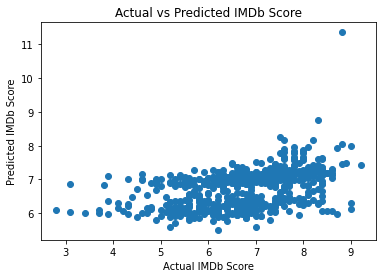

In [14]:
# Selecting the categorical and numerical columns in the dataframe
x_categorical = df_clean[['type', 'age_certification']]
x_numerical = df_clean[['release_year', 'imdb_votes', 'runtime']]

# Using OneHotEncoder to encode the categorical features and storing them in X_encoded. Meaningful names are also given by using the get_feature_names_out function
encoder = OneHotEncoder(sparse=False)
x_encoded = pd.DataFrame(encoder.fit_transform(x_categorical), columns=encoder.get_feature_names_out(['type', 'age_certification']))

# Combining the encoded columns and the numerical columns to a single matrix
x = pd.concat([x_encoded, x_numerical], axis=1)

# Assigning the target variable to imdb_score
y = df_clean['imdb_score']

# Splitting the data into 80% training and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creates the Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluating the model based on the mean squared error and model score
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

model_score = model.score(x_test, y_test)
print(f'Model Score: {model_score}')

# Plotting the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs Predicted IMDb Score')
plt.show()

Polynomial Regression Mean Squared Error: 0.9375811544408333
Polynomial Regression Model Score: 0.23452820233269767


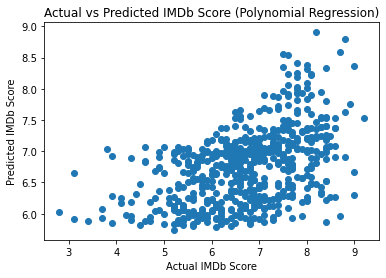

In [15]:
# Creating a polynomial regression pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x_train, y_train)

# Making predictions on the test set
poly_predictions = poly_model.predict(x_test)

# Evaluating the model
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_score = poly_model.score(x_test, y_test)

# Printing the Mean Squared Error and Model Score
print(f'Polynomial Regression Mean Squared Error: {poly_mse}')
print(f'Polynomial Regression Model Score: {poly_score}')

# Plotting the results
plt.scatter(y_test, poly_predictions)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs Predicted IMDb Score (Polynomial Regression)')
plt.show()

In [16]:
# Assigning the features and target variables
x = df_clean[['runtime', 'release_year', 'imdb_votes']].values
y = df_clean['imdb_score'].values

# Setting the degree for polynomial features
degree = 2

# Creating a pipeline with Polynomial Regression and Linear Regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Performing k-fold cross-validation (let's say k=5 for this example)
k = 5
mse_scores = -cross_val_score(model, x, y, cv=k, scoring='neg_mean_squared_error')

# Printing the mean squared error scores for each fold
for i, mse in enumerate(mse_scores, 1):
    print(f'Fold {i}, Mean Squared Error: {mse}')

# Printing the average mean squared error across all folds
average_mse = np.mean(mse_scores)
print(f'Average Mean Squared Error: {average_mse}')

Fold 1, Mean Squared Error: 14.56543689640645
Fold 2, Mean Squared Error: 1.107524883449692
Fold 3, Mean Squared Error: 1.2220036944184478
Fold 4, Mean Squared Error: 1.0210765806469742
Fold 5, Mean Squared Error: 1.3880145152569632
Average Mean Squared Error: 3.860811314035705


Iteration 0, Mean Squared Error: 46.58591898225645
Iteration 100, Mean Squared Error: 4.108791369062303
Iteration 200, Mean Squared Error: 2.398924822650133
Iteration 300, Mean Squared Error: 2.326607807359628
Iteration 400, Mean Squared Error: 2.320253543820202
Iteration 500, Mean Squared Error: 2.3167197311918897
Iteration 600, Mean Squared Error: 2.3134502960279377
Iteration 700, Mean Squared Error: 2.3103249372749914
Iteration 800, Mean Squared Error: 2.3073233374444504
Iteration 900, Mean Squared Error: 2.3044310866390356


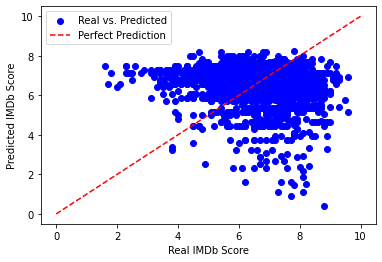

In [17]:
# Function that calculates the mean squared error between the real and predicted value
def mean_squared_error(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)


# Gradient descent function which takes in the x, y, learning rate and interation.
def gradient_descent(x, y, learning_rate, iterations):
    # Gets the rows and features from the x matrix
    num_samples, num_features = x.shape
    # Sets the weight and bias to 0
    weights = np.zeros(num_features)
    bias = 0

    # For loop that interates based on the number of iteration
    for iteration in range(iterations):
        # Calculating the prediction based on the current weight and bias
        predictions = np.dot(x, weights) + bias

        # Calculate gradients by multiplying by a constant factor
        # The weight is calculated by using the np.dot function which performs the dot product of the 
        # transpose matrix and the difference between the predicted and real y values
        i_weight = -(2/num_samples) * np.dot(x.T, (y - predictions))
        # Calculating the sum of difference between the real and predicted value
        i_bias = -(2/num_samples) * np.sum(y - predictions)

        # Updating the weights and bias by multiplying with the learning rate
        weights -= learning_rate * i_weight
        bias -= learning_rate * i_bias

        if iteration % 100 == 0:
            # Calculating the mean squared error
            mse = mean_squared_error(y, predictions)
            # Printing the mean squared error for every 100 iterations
            print(f'Iteration {iteration}, Mean Squared Error: {mse}')

    return weights, bias


# Predict function that follows the linear regression model's formula which calculates the 
# dot product of x and the weight then adding the bias
def predict(x, weights, bias):
    return np.dot(x, weights) + bias


# Scaler which takes in the data and sets the minimum and maximum value
def scaler(data, new_min, new_max):
    old_min, old_max = np.min(data), np.max(data)
    scaled_data = new_min + (data - old_min) * (new_max - new_min) / (old_max - old_min)
    return scaled_data


# Setting the feature variables and target variable
x_train = df_clean[['runtime', 'release_year', 'imdb_votes']].values
y_train = df_clean['imdb_score'].values.reshape(-1, 1)

x_train_scaled = np.zeros_like(x_train)

# Scalling the features to 0 to 10
for i in range(x_train.shape[1]):
    x_train_scaled[:, i] = scaler(x_train[:, i], new_min=0, new_max=10)

# Adding a bias term to x
bias_term = np.ones((x_train_scaled.shape[0], 1))
x_train_bias = np.concatenate((bias_term, x_train_scaled), axis=1)

# Training the model
weights, bias = gradient_descent(x_train_bias, y_train.flatten(), 0.0001, 1000)

# Making prediction
predictions = predict(x_train_bias, weights, bias)

# Plotting the real vs predicted IMDb scores
plt.scatter(y_train, predictions, label='Real vs. Predicted', color='blue')
plt.plot([0, 10], [0, 10], color='red', linestyle='dashed', label='Perfect Prediction')
plt.xlabel('Real IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.legend()

plt.show()